# Probability Plotting

Probability plotting is a method of estimating, the old fashioned way (paper and pencil) the parameters of an assumed distribution.

The Surpyval module uses the least squares onto the probability plot (except for the Gamma distribution) for the 'MPP' method.

Although on most occassions it is sensible to use the Maximum Likelihood Estimate, it is prudent to check that your fitted model resembles your data. The plot function of the parametric distribution does exctly that. It plots the transformed non parametric CDF with the line of best fit for that model over the top. This allows you to do a quick sense check on the fit. Demonstrated in this notebook is some of the results you can achieve with the Surpyval module.

In [1]:
import surpyval as surv
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dist = surv.Uniform
x = dist.random(1000, 3, 20)
model = dist.fit(x, how='MLE')
print(model)

Parametric Surpyval model with Uniform distribution fitted by MLE yielding parameters (3.008280680345488, 19.994741727743303)


Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (20.95875103963485, 2.9653414252170647)


C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


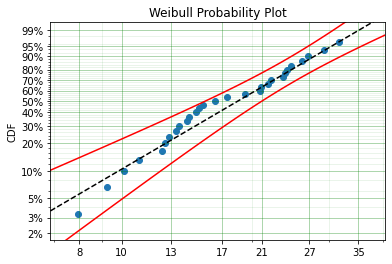

In [11]:
dist = surv.Weibull
x = dist.random(30, 20, 3)
model = dist.fit(x, how='MLE')
print(model)
model.plot();

C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (7.086195756079393, 3.0787477818861007)


C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


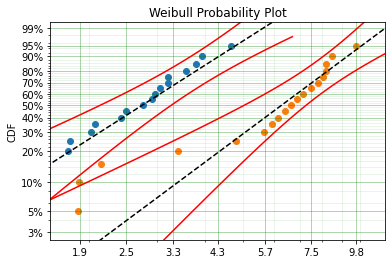

In [24]:
dist = surv.Weibull
x = dist.random(20, 3, 3.)
x2 = dist.random(20, 7, 3.)
model = dist.fit(x, how='MLE')
model.plot();
model2 = dist.fit(x2, how='MLE')
model2.plot();
print(model2)

Parametric Surpyval model with ExpoWeibull distribution fitted by MLE yielding parameters (5.2582025036580236, 6.022057819042122, 1.399645190668671)


C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


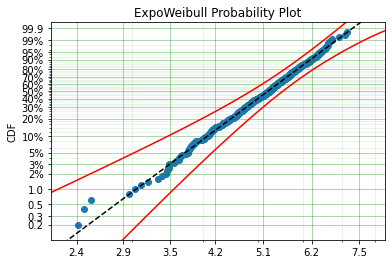

In [12]:
x = surv.ExpoWeibull.random(500, 5, 5., 2.)

model = surv.ExpoWeibull.fit(x, how='MLE')
model.plot();
print(model)

Offset Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (7.141925216140329, 2.6204524040113095) with offset of 39.76562962868052


C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


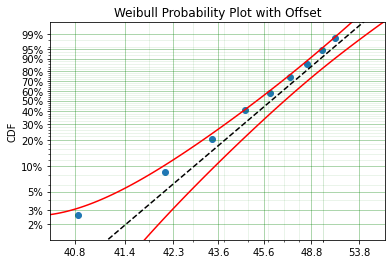

In [9]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.
n = np.concatenate([[n[0]], np.diff(n)])
# n = None
c = None
# n = None
dist = surv.Weibull
model = dist.fit(x, c=c, n=n, how='MLE', offset=True)
#print(model.res)
# model = dist.fit(x, c=c, n=n, how='MLE')
print(model)
model.plot(plot_bounds=True);

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (985.7952430751669, 9.123720162540572)


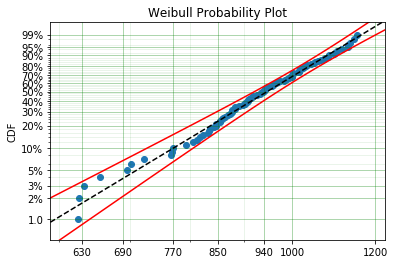

In [4]:
x = surv.Weibull.random(100, 1000, 10)

model = surv.Weibull.fit(x, how='MLE', rr='x')
model.plot()
print(model)

Parametric Surpyval model with Beta distribution fitted by MLE yielding parameters (4.0, 0.5185385945753678)


C:\Users\knifd\AppData\Roaming\Python\Python38\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in power
  return f_raw(*args, **kwargs)


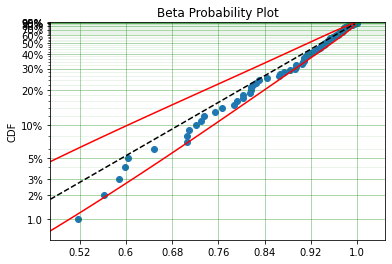

In [21]:
x = surv.Beta.random(100, 4, .5)
model = surv.Beta.fit(x, how='MLE', fixed={'alpha' : 4.}) 
print(model)
model.plot()

In [22]:
x = surv.Gamma.random(20, 5., 2)
surv.Gamma.fit(x, how='MLE', fixed={'alpha' : 7.}).params

TypeError: parameter_initialiser() got an unexpected keyword argument 'offset'

Offset Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (7.972491095879379, 2.9640882980510157) with offset of 39.0


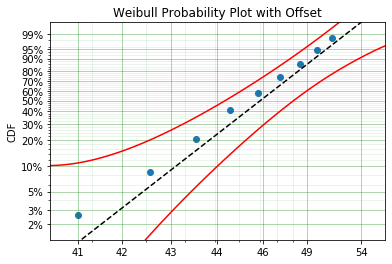

In [8]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
n = np.concatenate([[n[0]], np.diff(n)])
# n = None
c = None
# n = None
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.
dist = surv.Weibull
model = dist.fit(x, c=c, n=n, how='MLE', offset=True, fixed={'gamma' : 39.})
# model = dist.fit(x, c=c, n=n, how='MLE')
print(model)
model.plot(plot_bounds=True);

(46.91879321285708, 21.708479231520904)

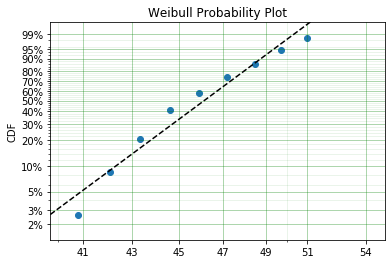

In [21]:
model_fixed = surv.Weibull.fit(x, c=c, n=n, how='MPP', fixed={'alpha' : 41.})
model_fixed.plot()
model_fixed.params

Autograd attempt failed, using without hessian
Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (47.40028055763294, 18.0)


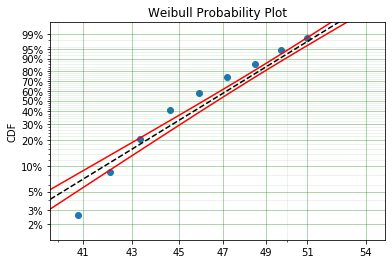

In [11]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
n = np.concatenate([[n[0]], np.diff(n)])
# n = None
c = None
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.

weib_3p = surv.Weibull.fit(x, c=c, n=n, how='MLE', fixed={'beta' : 18.})
# weib_3p = surv.Weibull.fit(x, c=c, n=n, how='MLE')
weib_3p.plot(plot_bounds=True);
print(weib_3p)

In [18]:
x = [2, 2, 2, 5, 6, [4, 6], [3, 4], [1, np.inf]]
c = [0, 1, -1, -1, 1, 2,      2,       2]
n = [10, 1, 1, 1, 1, 2, 1, 1]

Autograd attempt failed, using without hessian
Autograd attempt failed, using without hessian
Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (3.0, 2.001507394913515)


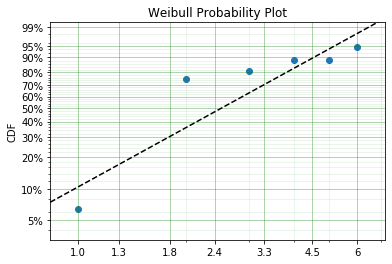

In [19]:
model = surv.Weibull.fit(x, c, n, 'MLE', fixed={'alpha' : 3.})
np_model = surv.Turnbull.fit(x, c, n)
model.plot('Turnbull')
print(model)

In [20]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 4, 5, 6, 7, 8]
c = None
n = None

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (5.774600409714656, 2.479094128181022)


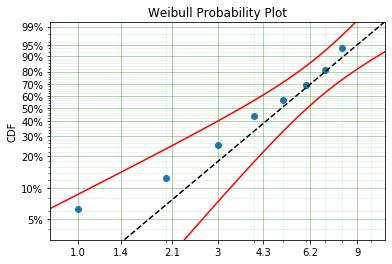

In [21]:
model = surv.Weibull.fit(x, c, n)
np_model = surv.Turnbull.fit(x, c, n)
model.plot()
print(model)

/Users/DerrynKnife1/Projects/surpyval/surpyval/nonparametric/nonparametric.py:74: RuntimeWarning: divide by zero encountered in log
  R_out = self.greenwood * 1./(np.log(self.R)**2)
/Users/DerrynKnife1/Projects/surpyval/surpyval/nonparametric/nonparametric.py:74: RuntimeWarning: invalid value encountered in true_divide
  R_out = self.greenwood * 1./(np.log(self.R)**2)
/Users/DerrynKnife1/Projects/surpyval/surpyval/nonparametric/nonparametric.py:75: RuntimeWarning: divide by zero encountered in log
  R_out = np.log(-np.log(self.R)) - stat * np.sqrt(R_out)


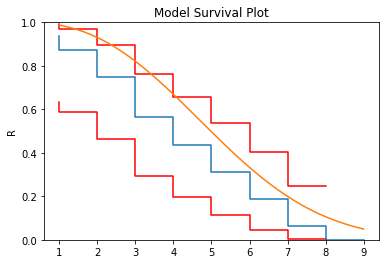

In [22]:
np_model.plot()
xx = np.linspace(1, 9)
plt.plot(xx, model.sf(xx))

In [23]:
x = surv.Gamma.random(100, 5, 10)

model = surv.ExpoWeibull.fit(x, how='MLE', rr='x')
model.plot()
print(model)

TypeError: mpp_y_transform() missing 1 required positional argument: 'mu'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdab7c2c9e0> (for post_execute):


TypeError: mpp_y_transform() missing 1 required positional argument: 'mu'

TypeError: mpp_y_transform() missing 1 required positional argument: 'mu'

<Figure size 432x288 with 1 Axes>

In [23]:
x = [2, 3, 4, 5, 5, 6, 7, 9, 10, 14, 15, 16, 16, 17, 18]
model = surv.Weibull3p.fit(x)
model.plot('Nelson-Aalen', plot_bounds=True);
print(model.params)
# mm = surv.MixtureModel(x=x, dist=surv.Weibull, m=2)
# mm.fit(how='MLE')
##mm.plot('Nelson-Aalen', plot_bounds=False)

# xx = np.linspace(1, 20)
# plt.plot(xx, 1 - mm.R_cb(xx, cb=0.05), color='red');

TypeError: parameter_initialiser() got an unexpected keyword argument 'offset'

(3.373797853709159, 1.6934744669814403)

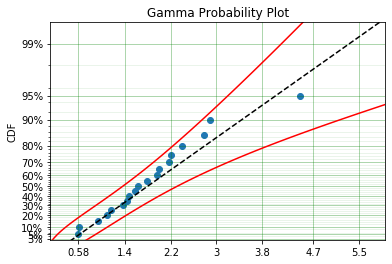

In [15]:
dist = surv.Gamma
x = [2, 3, 4, 5, 5, 6, 7, 8, 10, 14, 15, 16, 16, 17, 17, 18]
x = surv.Gamma.random(20, 4, 2)
model = dist.fit(x, how='MLE')
model.plot(heuristic='Turnbull', plot_bounds=True);
model.params

Using a ball bearing failure time data set from Lieblein and Zelen (1956). Can be found [here](https://nvlpubs.nist.gov/nistpubs/jres/057/5/V57.N05.A04.pdf)

(81.87455872386947, 2.1018468637694045)

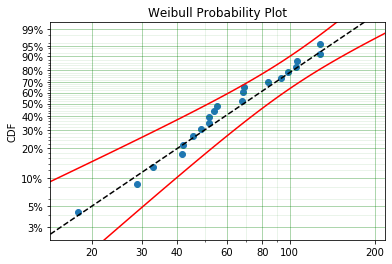

In [16]:
x = [17.88, 28.92, 33, 41.52, 42.12, 45.6, 48.4, 51.84, 
     51.96, 54.12, 55.56, 67.8, 68.64, 68.64, 68.88, 84.12, 
     93.12, 98.64, 105.12, 105.84, 127.92, 128.04, 173.4]
model = surv.Weibull.fit(x)
model.plot()
plt.savefig('weibull_plot.png')
model.params

Using data from the man the distribution is named after! Weibull uses data on the tensile strength of bofors steel. Data can be accessed [here](https://pdfs.semanticscholar.org/88c3/7770028e7ed61180a34d6a837a9a4db3b264.pdf)

(74.66588100640693, 1.86563461191969, 5.20675649497333)

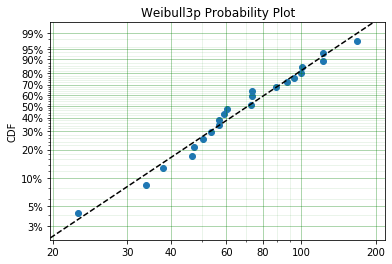

In [17]:
weib_3p = surv.Weibull3p.fit(x, n=None, how='MPP', rr='y', heuristic='Nelson-Aalen')
weib_3p.plot(heuristic='Nelson-Aalen', plot_bounds=False);
weib_3p.params

(90.53205325077793, 1.9833237250965545, 18.504068812494555)


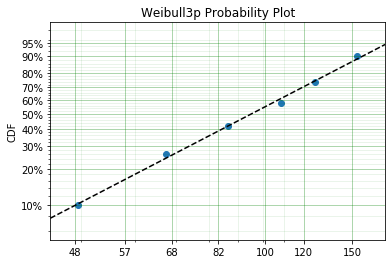

In [18]:
x = np.array([48, 66, 85, 107, 125, 152])
weib_3p = surv.Weibull3p.fit(x, how='MPP', heuristic='Blom')
print(weib_3p.params)
weib_3p.plot(heuristic='Blom', plot_bounds=False);

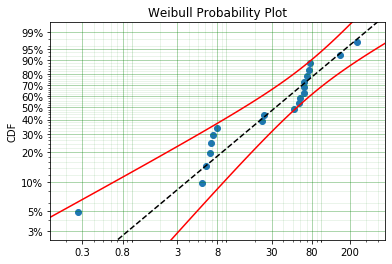

In [19]:
x = surv.Weibull.random(20, 50, 0.8)

model = surv.parametric.Weibull.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

We might also have a scenario where the reliability could be best modelled as a mixture of two Weibull distributions.

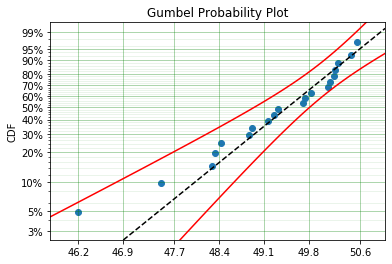

In [21]:
x = surv.Gumbel.random(20, 50, 0.6)

model = surv.parametric.Gumbel.fit(x, how='MLE')
model.plot(heuristic='Fleming-Harrington');

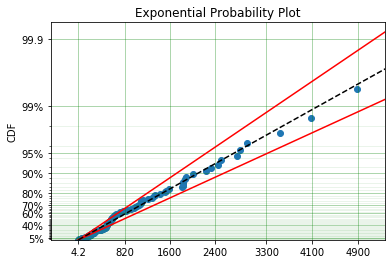

In [23]:
dist = surv.Exponential
x = dist.random(100, 1e-3)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

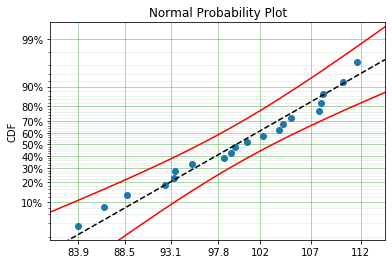

In [24]:
dist = surv.Normal
x = dist.random(20, 100, 10)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Filliben');

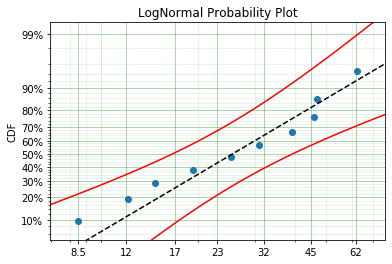

In [25]:
dist = surv.LogNormal
x = dist.random(10, 3, 0.8)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen', cb=0.05);

Parametric Surpyval model with Uniform distribution fitted by MPS yielding parameters (0.8179663616161638, 20.164355830164368)


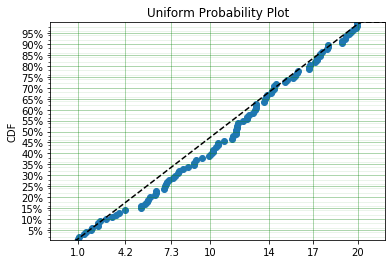

In [26]:
dist = surv.Uniform
x = dist.random(100, 1, 20)

model = dist.fit(x, how='MPS')
model.plot(heuristic='Fleming-Harrington', plot_bounds=False);
print(model)

(3.238096252679183, 18.9304191767462)

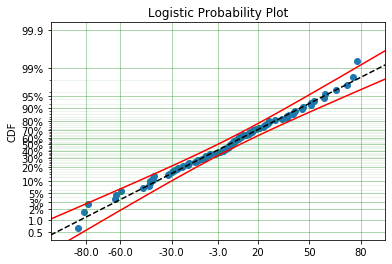

In [28]:
dist = surv.parametric.Logistic
x = dist.random(100, 1, 20)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Blom', plot_bounds=True);
model.params

Autograd attempt failed, using without hessian


(1.759232000547319, 0.9041924114141209)

/Users/DerrynKnife1/Projects/surpyval/surpyval/parametric/loglogistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log(1./y - 1)
/opt/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


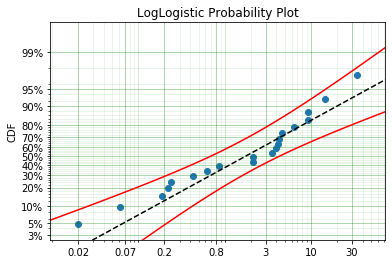

In [30]:
dist = surv.parametric.LogLogistic
x = dist.random(20, 3, 0.9)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen', plot_bounds=True);
model.params

In [31]:
import surpyval as surv
from surpyval import Weibull3p, Weibull
import numpy as np

In [32]:
x = Weibull3p.random(50, 5, 4, 50)
cens = 54.5
c = np.zeros_like(x)
c[x > cens] = 1
x[x > cens] = cens
n = None
x, c, n = surv.xcn_handler(x, c, n)

In [33]:
model = Weibull3p.fit(x, c, n, how='MLE')
model.params

(4.243605466685066, 2.3874353870582516, 50.958051716091234)

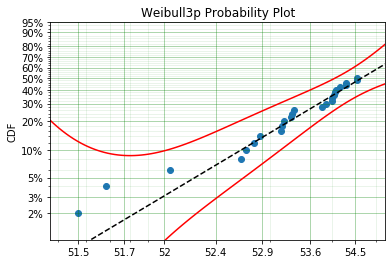

In [34]:
model.plot();